In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushroom.csv')

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


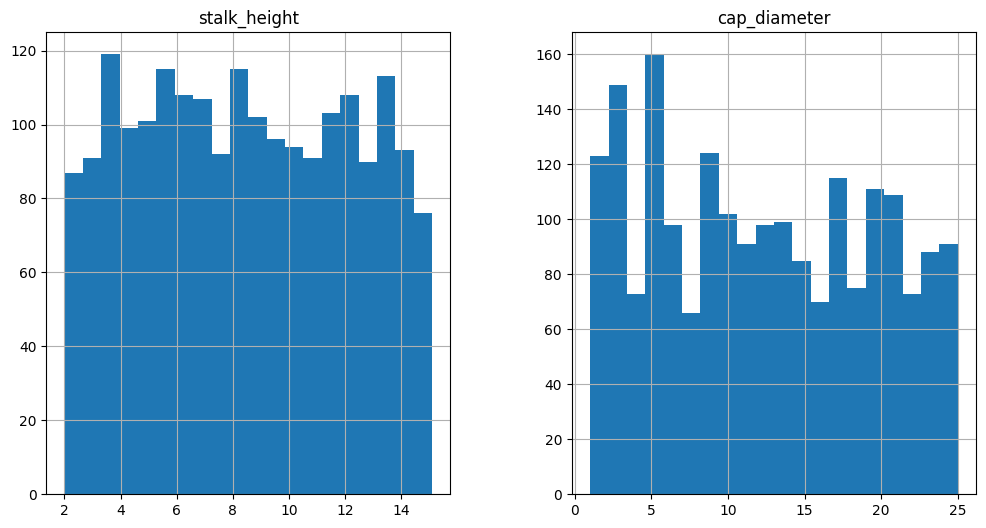

In [7]:
df.hist(bins=20, figsize=(12, 6))
plt.show()

<Axes: >

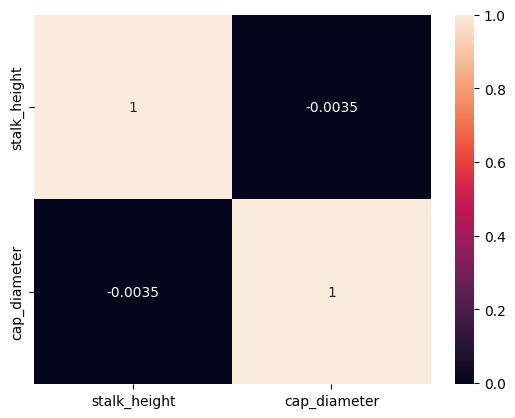

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
from sklearn.preprocessing import OneHotEncoder 

In [10]:
df1=pd.get_dummies(df,dtype='int')

In [11]:
df1.head()

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_edible,class_poisonous
0,14.276173,5.054983,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,3.952715,19.068319,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,9.054265,7.205884,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,5.226499,20.932692,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,14.037532,12.545245,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [12]:
df1['class_edible'].value_counts()


0    1400
1     600
Name: class_edible, dtype: int64

In [13]:
df1['class_poisonous'].value_counts()


1    1400
0     600
Name: class_poisonous, dtype: int64

In [14]:
target=df1['class_edible']

In [15]:
features=df1.drop('class_edible',axis=1)

In [16]:
df1.isnull().sum()

stalk_height         0
cap_diameter         0
cap_shape_bell       0
cap_shape_conical    0
cap_shape_convex     0
                    ..
habitat_urban        0
habitat_waste        0
habitat_woods        0
class_edible         0
class_poisonous      0
Length: 128, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 127)
(500, 127)
(1500,)
(500,)


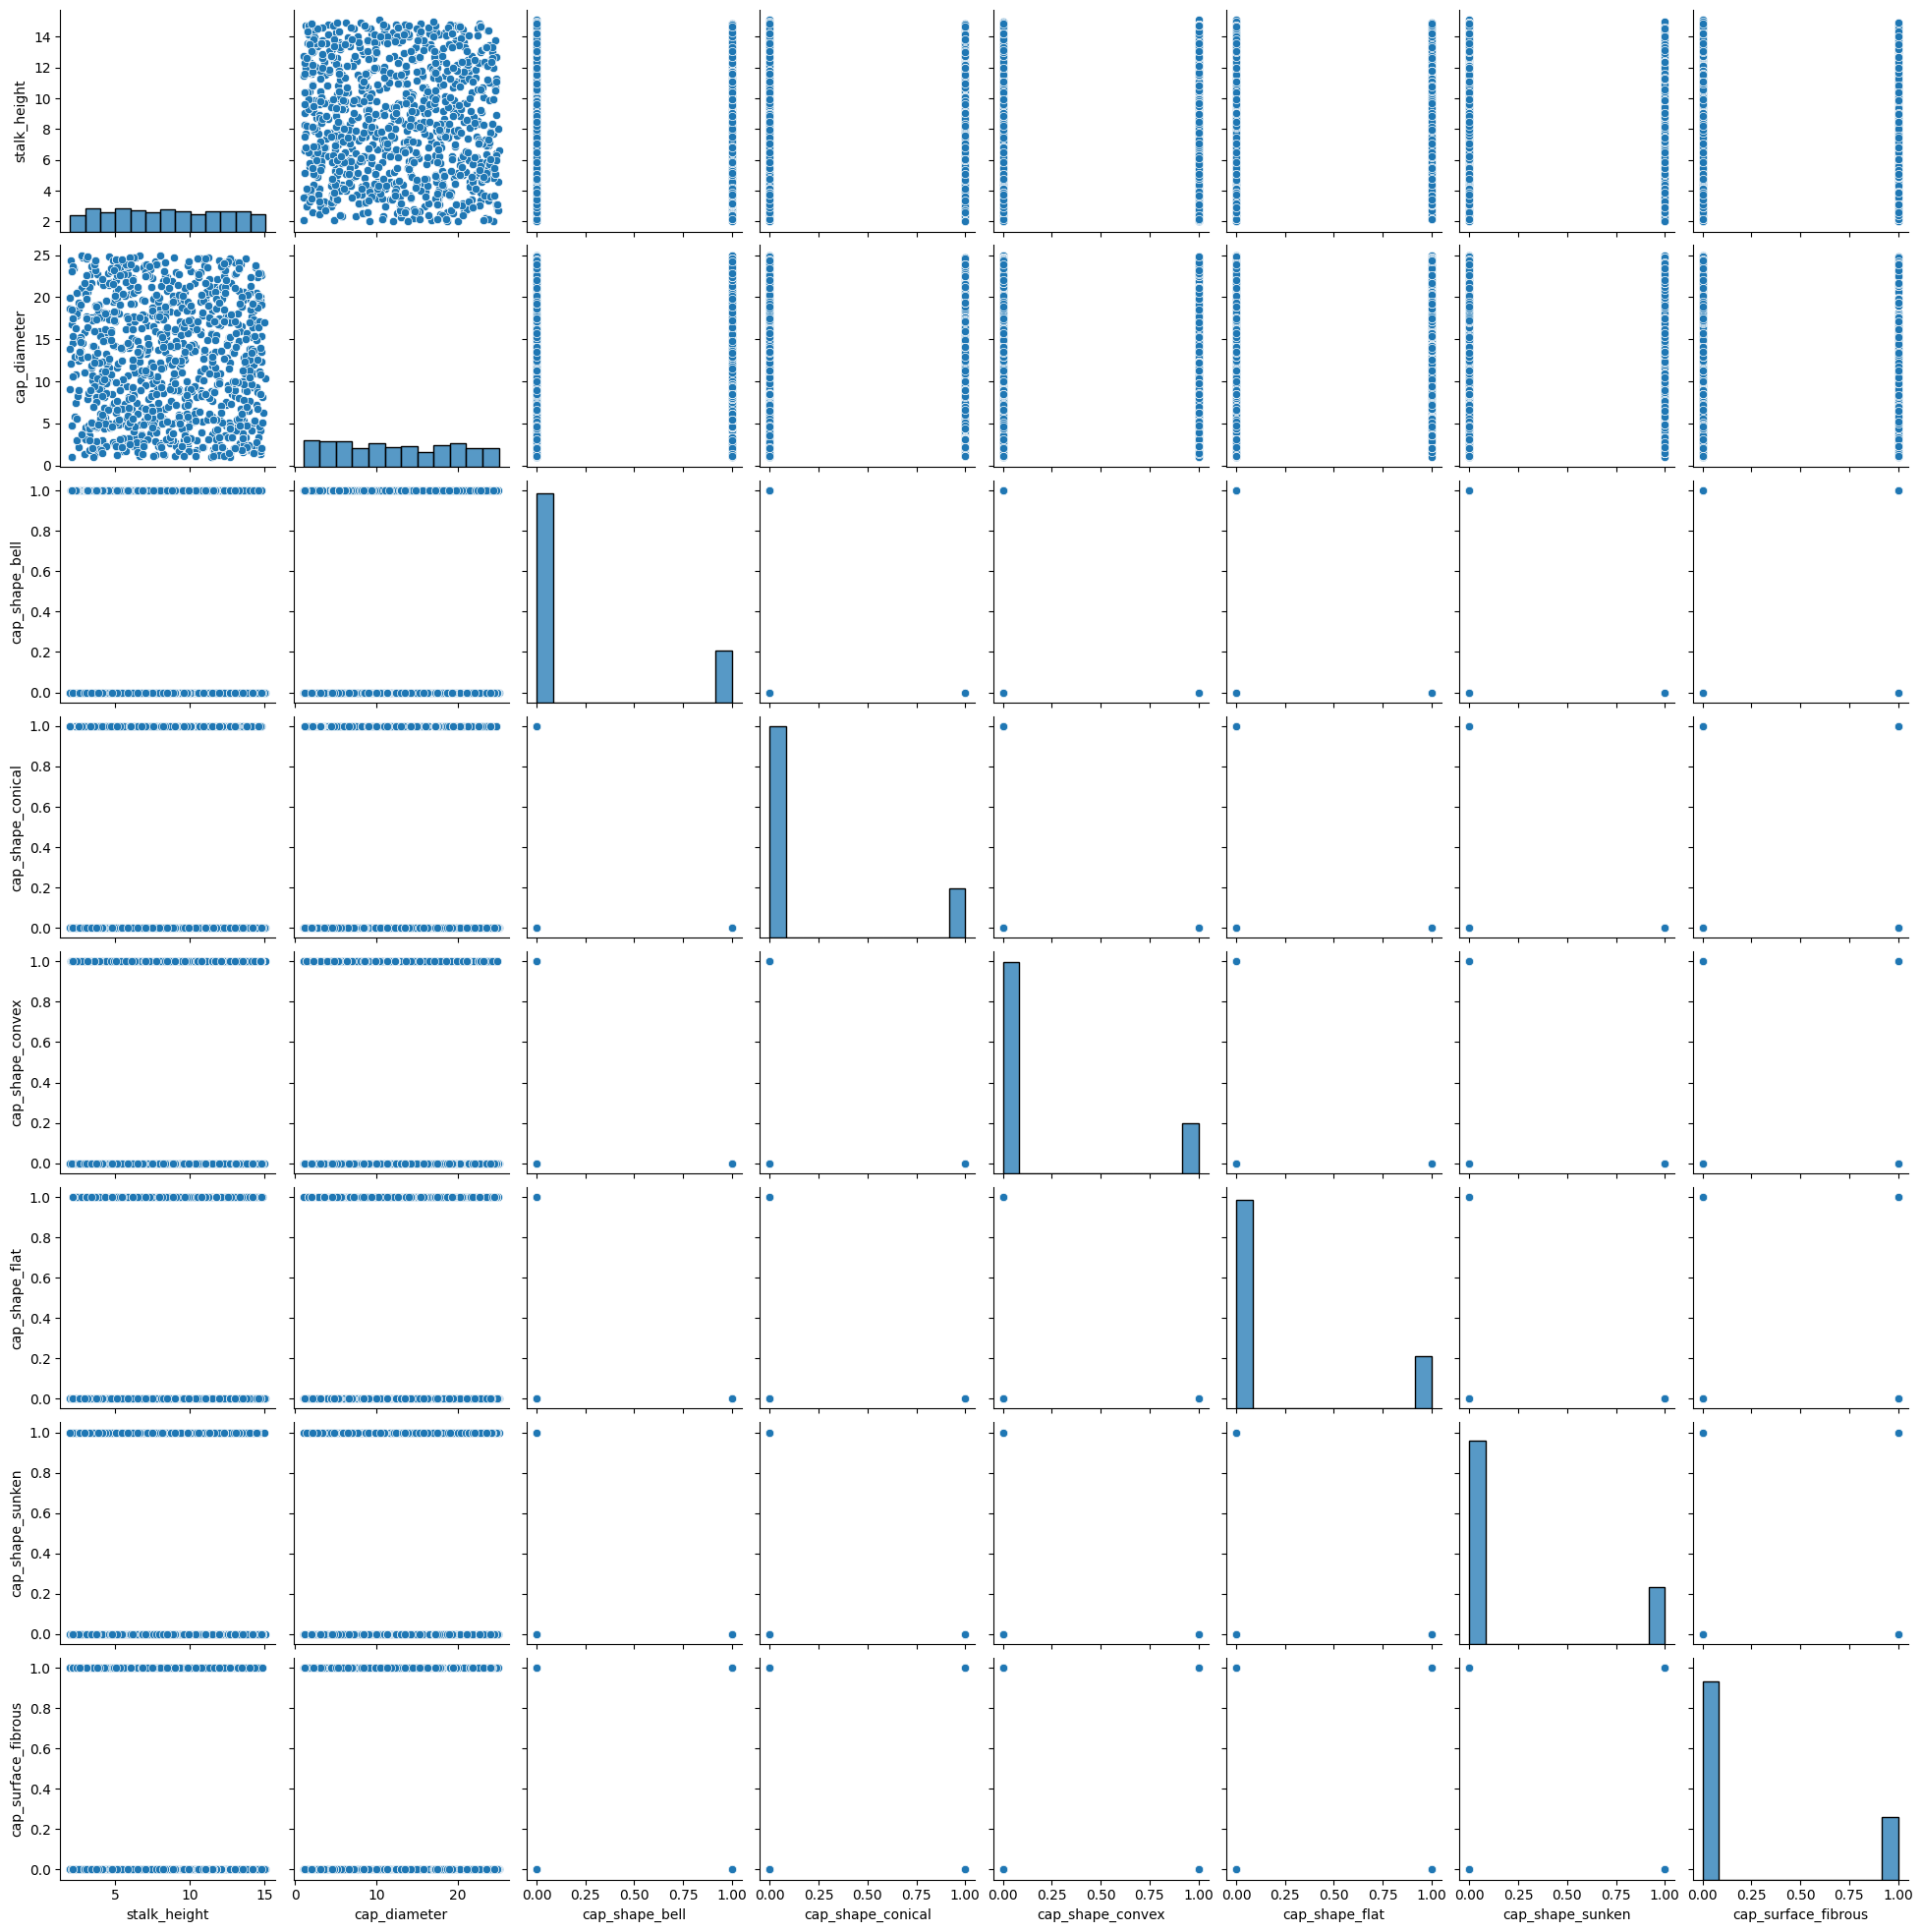

In [19]:
sns.pairplot(features.iloc[:, :8])
plt.show()

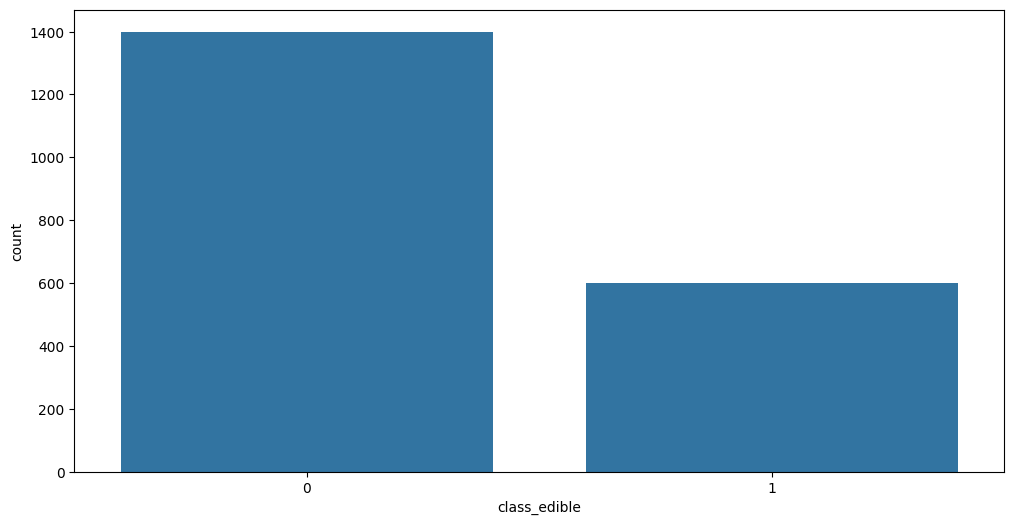

In [20]:
figure=plt.figure(figsize=(12,6))
sns.countplot(data=df1,x='class_edible')
plt.show()

In [21]:
from sklearn.svm import SVC


In [22]:
svc=SVC(C=5,kernel='poly',gamma=5)

In [23]:
svc.fit(x_train,y_train)

SVC(C=5, gamma=5, kernel='poly')

In [24]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report

In [25]:
y_pred=svc.predict(x_test)

In [26]:
accuracy_score(y_test,y_pred)

0.988

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       329
           1       0.99      0.97      0.98       171

    accuracy                           0.99       500
   macro avg       0.99      0.98      0.99       500
weighted avg       0.99      0.99      0.99       500



In [28]:
from sklearn.decomposition import PCA

In [29]:
pca=PCA(n_components=2)

In [30]:
x_test_pca=pca.fit_transform(x_test)
x_test_pca

array([[ 5.32438319e+00, -1.68290772e+00],
       [-9.49187989e+00,  1.60184277e+00],
       [ 1.62640911e+00, -2.39331242e+00],
       [ 1.19507139e+01, -5.52415416e+00],
       [ 8.49303875e-01, -2.61894459e-02],
       [ 1.08222708e+01, -2.22291556e+00],
       [ 9.98464510e-01,  1.72968408e+00],
       [ 1.18762986e+01, -3.51003356e+00],
       [-3.28398456e+00, -2.14943853e+00],
       [ 9.88118459e+00, -5.51981562e+00],
       [-9.49187989e+00,  1.60184277e+00],
       [ 1.61164351e+00,  4.67365288e+00],
       [ 2.64777450e+00, -2.41908414e-01],
       [ 1.10531442e+00, -1.27797950e+00],
       [ 2.60138738e+00,  1.88575065e-02],
       [-9.64715895e+00, -1.45104619e+00],
       [-6.68673098e+00, -2.41560239e+00],
       [-8.03944626e+00, -2.38846092e+00],
       [-8.95056688e+00, -1.38757145e+00],
       [-7.13738161e+00,  3.52663805e+00],
       [ 7.32559839e+00,  3.32409317e+00],
       [-8.66507341e-01, -7.86221257e-01],
       [ 1.09815035e+01,  4.72734194e+00],
       [ 6.

In [31]:
df_vis=pd.DataFrame(x_test_pca,columns=['pca1','pca2'])


In [32]:
df_vis['actual']=y_test
df_vis['predicted']=y_pred

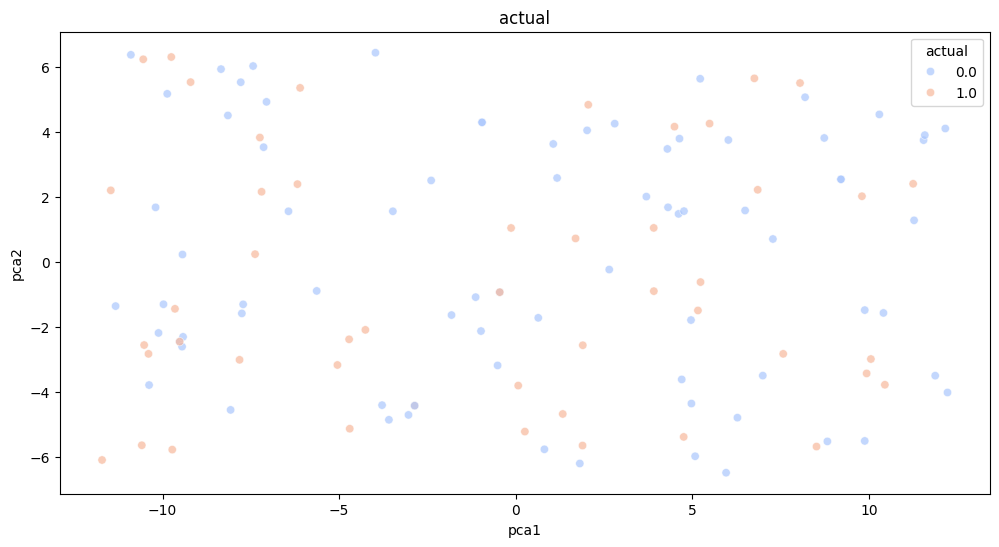

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca1', y='pca2', hue='actual', data=df_vis, palette='coolwarm', alpha=0.7)
plt.title('actual')
plt.show()

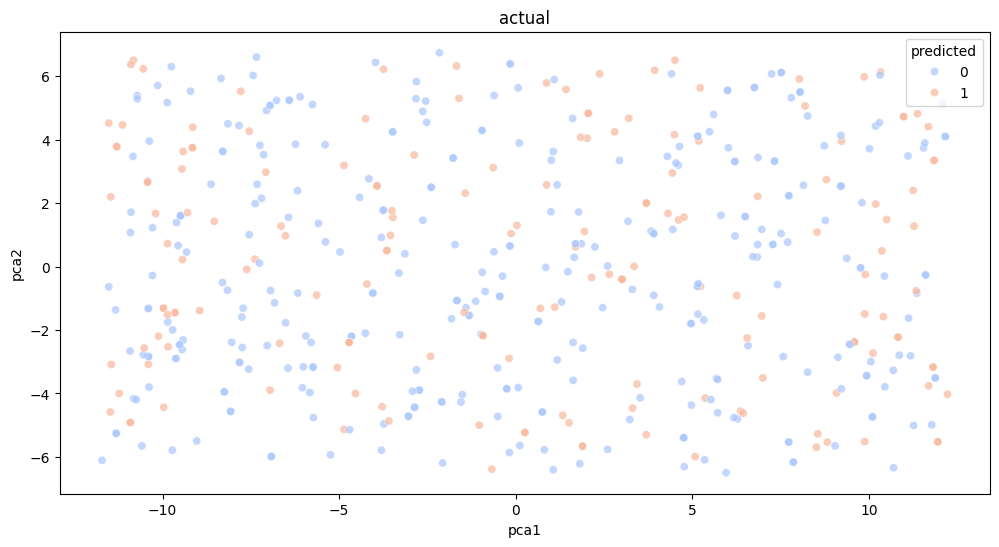

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca1', y='pca2', hue='predicted', data=df_vis, palette='coolwarm', alpha=0.7)
plt.title('actual')
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
params={'C':[0.1,2,1,10],'kernel':['linear','rbf'],'gamma':[0.1,0.2,0.5,1]}

In [37]:
grid_search=GridSearchCV(svc,params)

In [38]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=5, gamma=5, kernel='poly'),
             param_grid={'C': [0.1, 2, 1, 10], 'gamma': [0.1, 0.2, 0.5, 1],
                         'kernel': ['linear', 'rbf']})

In [39]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}